In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from data_prep import data_prep
import get_model
import utils

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
dfreal = pd.read_csv('dataset\Biomass_Private.csv')

data_loader = data_prep()
data_loader.create_images(width=80, height=64)
selected_pix = data_loader.selected_pix
images = data_loader.get_images()
dfbio = data_loader.dfbio

In [3]:
# fig, axes = plt.subplots(2,4, figsize=(20,8))
# for i,image in enumerate(images):
#     axes.flatten()[i].imshow(image, cmap='gray')

In [4]:
model = get_model.ConvLSTM_3(dfbio,images)
X_train, y_train, X_val, y_val = model.prepare_data(fit=False)
history = model.eval(X_train, y_train, X_val, y_val)
# preds_image, preds_list = model.predict(selected_pix)

Epoch 1/300
4/4 [==============================] - 10s 1s/step - loss: 65.3243 - val_loss: 74.0697 - lr: 0.0100
Epoch 2/300
4/4 [==============================] - 4s 951ms/step - loss: 63.3944 - val_loss: 72.9061 - lr: 0.0100
Epoch 3/300
4/4 [==============================] - 4s 917ms/step - loss: 62.3875 - val_loss: 71.6755 - lr: 0.0100
Epoch 4/300
4/4 [==============================] - 4s 895ms/step - loss: 61.2531 - val_loss: 71.3786 - lr: 0.0100
Epoch 5/300
4/4 [==============================] - 4s 892ms/step - loss: 59.9928 - val_loss: 69.9449 - lr: 0.0100
Epoch 6/300
4/4 [==============================] - 3s 892ms/step - loss: 58.6076 - val_loss: 69.8001 - lr: 0.0100
Epoch 7/300
4/4 [==============================] - 3s 878ms/step - loss: 57.1129 - val_loss: 69.2601 - lr: 0.0100
Epoch 8/300
4/4 [==============================] - 4s 904ms/step - loss: 55.4686 - val_loss: 68.5842 - lr: 0.0100
Epoch 9/300
4/4 [==============================] - 3s 876ms/step - loss: 53.6982 - val_los

50 100 200 250 : 27.428  
100 200 : 26.04

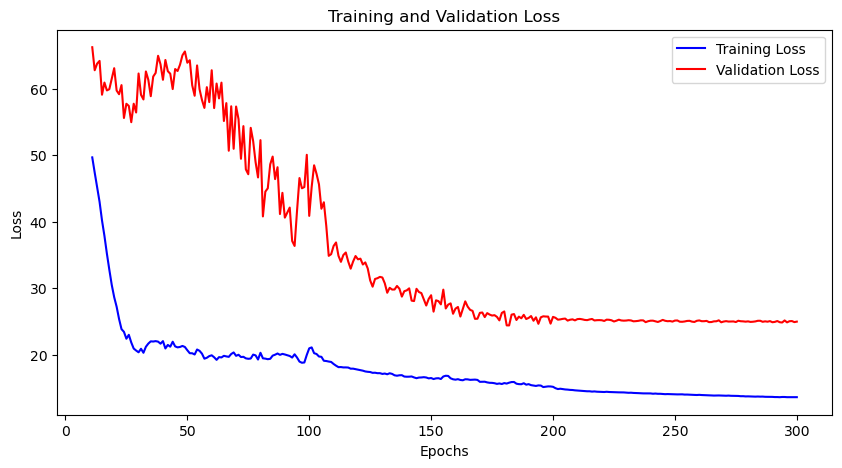

In [5]:
utils.plot_loss(history,offset=10,val=True)

In [ ]:
utils.save_model(model.model, 'ConvLSTM_M_300_26.04_val')

In [6]:
preds_image, preds_list = model.predict(selected_pix)

1/1 [==============================] - 0s 267ms/step


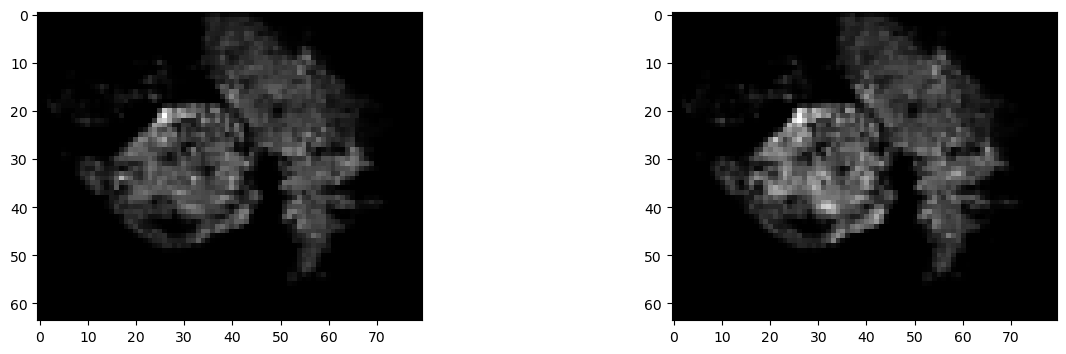

In [7]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
axes[0].imshow(preds_image[0][0,:,:,0], cmap='gray')
axes[1].imshow(preds_image[1][0,:,:,0], cmap='gray')

In [9]:
np.sum(preds_list['2018']),np.sum(preds_list['2019'])

(314366.3, 341446.94)

In [10]:
utils.real_eval(preds_list, dfreal)

(30.162558535276247, 42.89817501807357)